# Project 2 : Programming for Data Analyis


### Import python libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import norm
import math
import seaborn as sns
import matplotlib.pyplot as plt
import fileinput
#import pyleoclim as pyleo
#pyleo.set_style('web')

### Import dataset : CO2 data from Luthi et al. 2008 Nature Paper

In [2]:
df = pd.read_excel('./41586_2008_BFnature06949_MOESM31_ESM.xls', skiprows=range(0, 6))
df

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0
2,3036.44,623109,243.3,2.8,3085.78,688035.0,234.0
3,3040.87,630183,204.4,0.9,3086.88,688751.0,235.4
4,3043.07,635364,195.0,1.5,3087.98,689444.0,241.0
...,...,...,...,...,...,...,...
242,3187.87,794608,199.4,1.7,NaN,NaN,NaN
243,3188.23,795202,195.2,2.0,NaN,NaN,NaN
244,3188.98,796467,189.3,2.1,NaN,NaN,NaN
245,3189.33,797099,188.4,1.4,NaN,NaN,NaN


In [3]:
df = df.rename(columns={'EDC3_gas_a (yr)': 'Year','CO2 (ppmv)': 'CO2'})
df

,Depth (m),Year,CO2,sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0
2,3036.44,623109,243.3,2.8,3085.78,688035.0,234.0
3,3040.87,630183,204.4,0.9,3086.88,688751.0,235.4
4,3043.07,635364,195.0,1.5,3087.98,689444.0,241.0
...,...,...,...,...,...,...,...
242,3187.87,794608,199.4,1.7,NaN,NaN,NaN
243,3188.23,795202,195.2,2.0,NaN,NaN,NaN
244,3188.98,796467,189.3,2.1,NaN,NaN,NaN
245,3189.33,797099,188.4,1.4,NaN,NaN,NaN


In [4]:
df.index = df["Year"]

In [5]:
#df.plot()

Text(0.5, 1.0, 'CO2 between 625000 and 800,000 years ago')

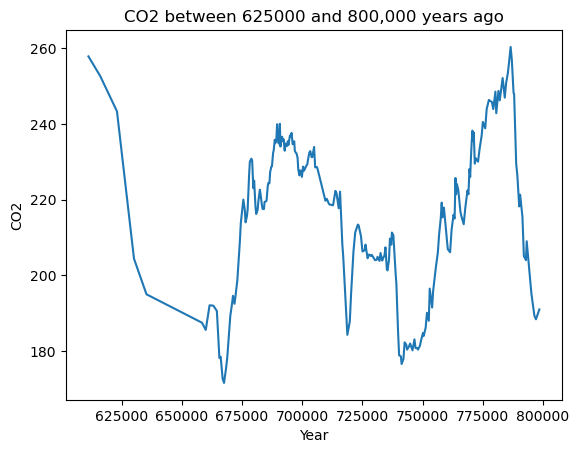

In [6]:
#plt.plot(x="Year",y="CO2")
sns.lineplot(data=df, x="Year", y="CO2")
plt.title('CO2 between 625000 and 800,000 years ago')

In [7]:
df.dtypes

Depth (m)            float64
Year                   int64
CO2                  float64
sigma (ppmv)         float64
Depth (m).1          float64
EDC3_gas_a (yr).1    float64
CO2 (ppmv).1         float64
dtype: object

In [8]:
df.describe()

,Depth (m),Year,CO2,sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
count,247.000000,247.000000,247.000000,247.000000,47.000000,47.000000,47.00000
mean,3123.501134,723999.655870,216.088664,1.248178,3148.893617,750698.170213,222.33617
std,40.589369,41319.636469,20.259783,0.614713,35.427754,36597.113508,20.93293
min,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.50000
25%,3089.115000,690175.500000,203.950000,0.800000,3130.880000,729879.000000,208.15000
50%,3125.530000,723464.000000,218.400000,1.100000,3160.580000,760338.000000,224.20000
75%,3159.535000,759094.500000,231.850000,1.600000,3174.330000,778397.500000,238.95000
max,3190.080000,798512.000000,260.300000,3.700000,3190.280000,798893.000000,256.60000


In [9]:
df.size

1729

In [10]:
df_comp = pd.read_excel('./41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name = 2, skiprows=range(0, 6))
df_comp

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


In [11]:
df_comp = df_comp.rename(columns={'EDC3_gas_a (yr)': 'Year','CO2 (ppmv)': 'CO2'})
df_comp

,Year,CO2
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


Text(0.5, 1.0, 'CO2 over the past 800,000 years')

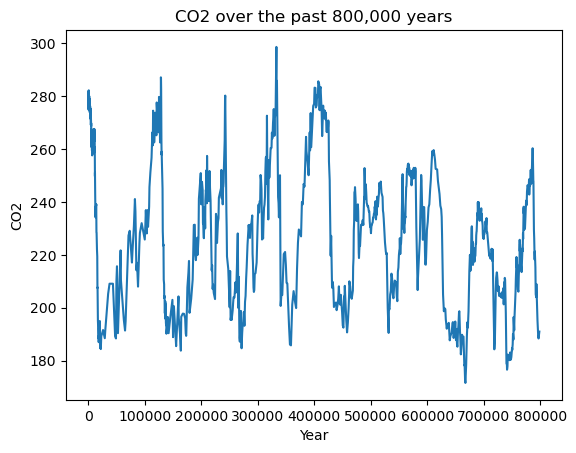

In [12]:
sns.lineplot(data=df_comp, x="Year", y="CO2", palette='coolwarm')
plt.title('CO2 over the past 800,000 years')

In [13]:
#https://www.co2.earth/daily-co2
df2 = pd.DataFrame([[0,420]], columns=['Year','CO2'])
df2

,Year,CO2
0,0,420


In [14]:
df_comp = pd.concat([df2, df_comp]).reset_index(drop=True)
df_comp

,Year,CO2
0,0,420.0
1,137,280.4
2,268,274.9
3,279,277.9
4,395,279.1
...,...,...
1092,794608,199.4
1093,795202,195.2
1094,796467,189.3
1095,797099,188.4


In [15]:
df_comp.dtypes

Year      int64
CO2     float64
dtype: object

In [16]:
#pd.to_timedelta(df_comp['Year'], unit='Y')

Text(0.5, 1.0, 'CO2 over the past 800,000 years')

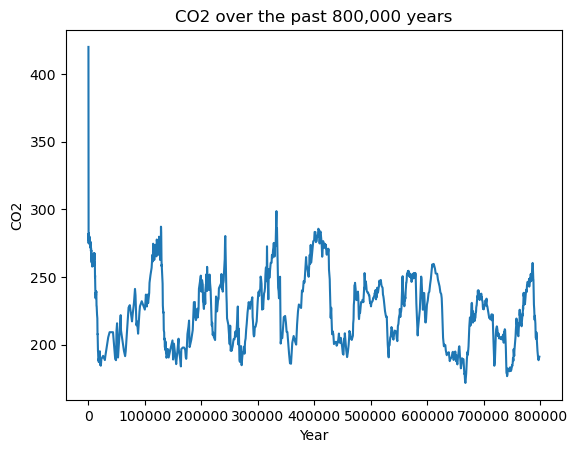

In [17]:
sns.lineplot(data=df_comp, x="Year", y="CO2", palette='coolwarm')
plt.title('CO2 over the past 800,000 years')

### Import dataset : Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC 

In [18]:
df1 = pd.read_excel('./epicaDC.deuttemp.EDC3-AICC.xlsx')
df1

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


In [19]:
df1.describe()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
count,5819.00000,5819.000000,5819.000000,5819.000000,5804.000000,5819.000000,5819.000000
mean,2910.00000,1599.950000,191800.948469,192715.210134,-417.742884,213.474721,2.044824
std,1679.94494,923.969717,193448.729761,195698.666350,17.949569,3.130075,0.678126
min,1.00000,0.000000,-50.000000,-55.000000,-450.100000,207.900000,1.096556
25%,1455.50000,799.975000,47540.535000,46505.000000,-432.300000,210.900000,1.508500
50%,2910.00000,1599.950000,123446.200000,121574.666700,-421.300000,212.900000,1.838000
75%,4364.50000,2399.925000,276835.550000,277050.500000,-403.200000,216.000000,2.514000
max,5819.00000,3199.900000,820093.900000,821838.000000,-361.200000,223.100000,4.641000


In [20]:
df1.size

40733

In [21]:
#df1.index = df1["AICC2012"]
#df1

In [22]:
df1.temp

0       218.3
1       218.3
2       218.3
3       218.3
4       218.3
        ...  
5814    211.0
5815    211.2
5816    211.3
5817    211.4
5818    211.4
Name: temp, Length: 5819, dtype: float64

Text(0.5, 1.0, 'Temperature over the past 800,000 years')

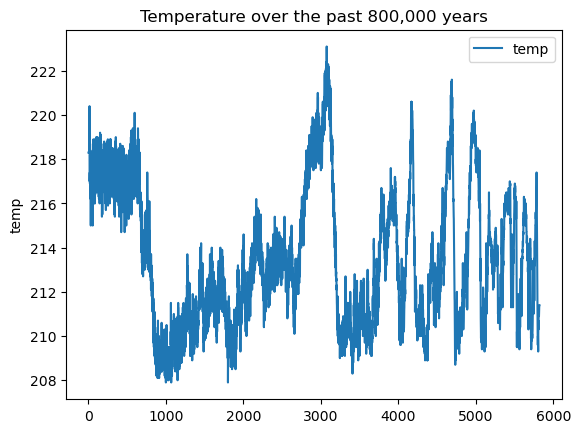

In [23]:
df1.plot(y='temp', ylabel='temp')
plt.title('Temperature over the past 800,000 years')

Text(0.5, 1.0, 'Temperature over the past 800,000 years')

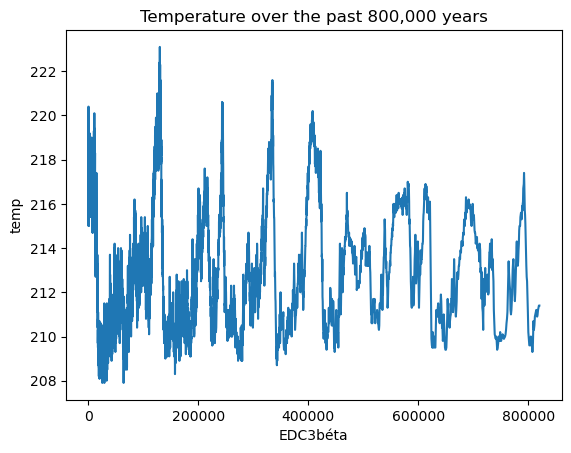

In [24]:
sns.lineplot(data=df1, x="EDC3béta", y="temp")
plt.title('Temperature over the past 800,000 years')

Text(0.5, 1.0, 'Temperature over the past 800,000 years')

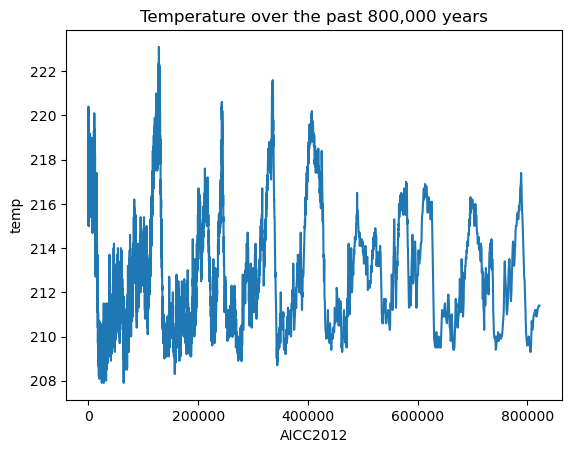

In [25]:
sns.lineplot(data=df1, x="AICC2012", y="temp")
plt.title('Temperature over the past 800,000 years')

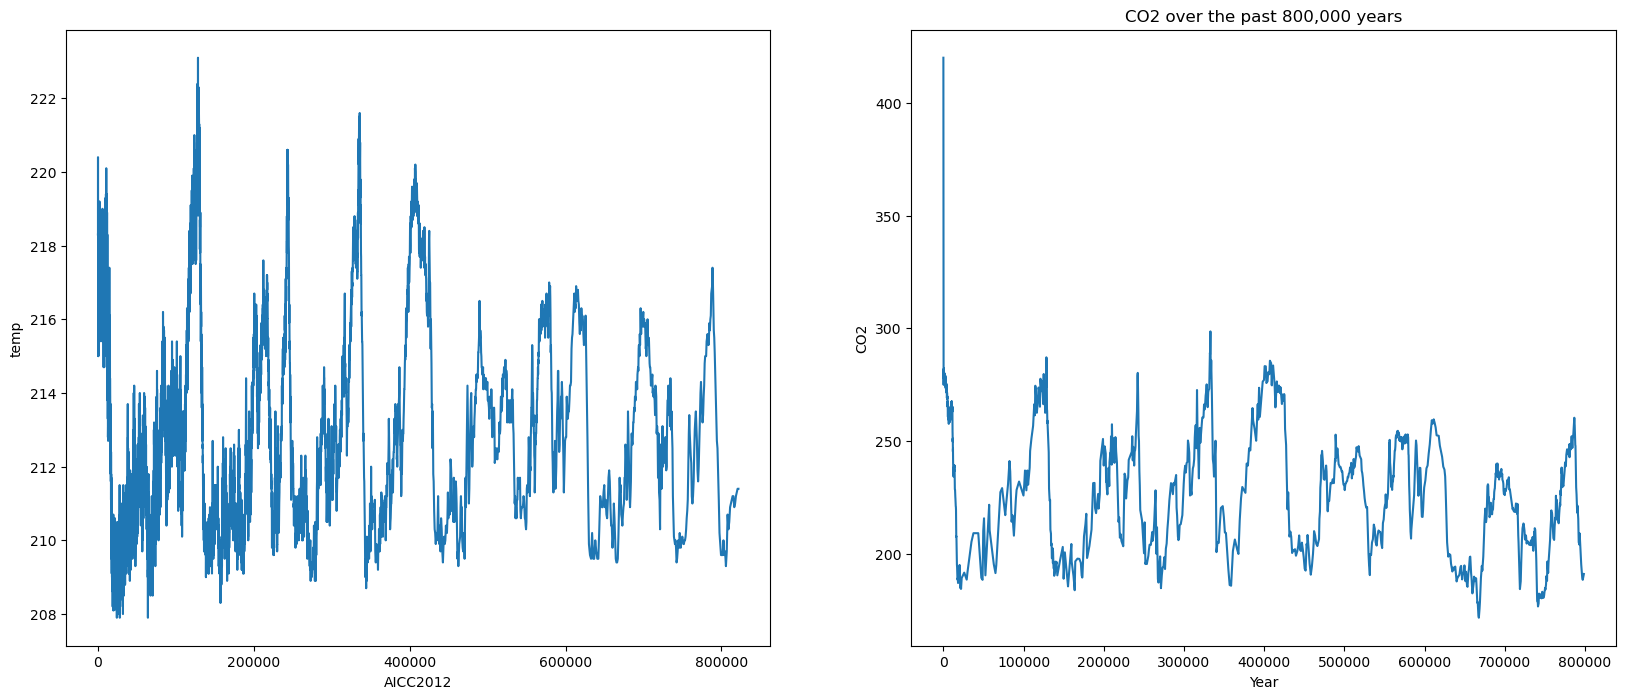

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax1)
plt.title('Temperature over the past 800,000 years')
sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax2)
plt.title('CO2 over the past 800,000 years')
plt.show()

In [27]:
#fig, ax = plt.subplots(figsize=(20,8))
#sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax)
#sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax)
#plt.show()

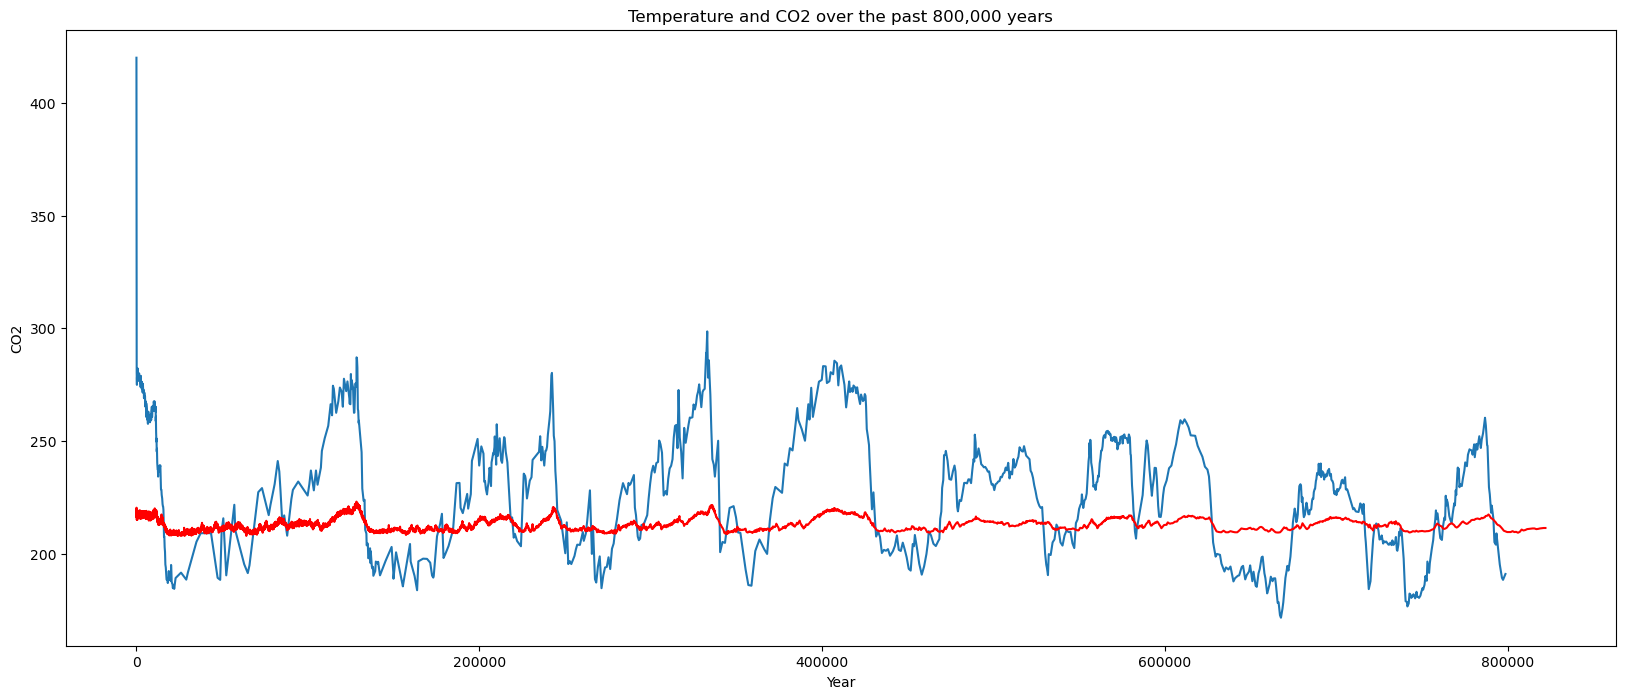

In [28]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax)
sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax, color = "red")
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

In [29]:
#df_comp.index = df_comp["Year"]
#df_comp

In [30]:
#df_comp.plot()

In [31]:
#ax = df_comp['CO2'].plot()
#ax2 = df_comp['temp'].plot(secondary_y=True)
#ax2.set_ylim(200, 230)
#plt.show()

In [32]:
temp = df1.temp
df_comp["temp"] = temp
df_comp

,Year,CO2,temp
0,0,420.0,218.3
1,137,280.4,218.3
2,268,274.9,218.3
3,279,277.9,218.3
4,395,279.1,218.3
...,...,...,...
1092,794608,199.4,209.3
1093,795202,195.2,209.5
1094,796467,189.3,209.2
1095,797099,188.4,210.1


In [33]:
#fig, ax1 = plt.subplots()
#ax1.plot(df_comp['Year'], df_comp['CO2'])
# ...
#ax2 = ax1.twinx()
#ax2.plot(df["temp"])
#ax2.set_ylim([200, 230])

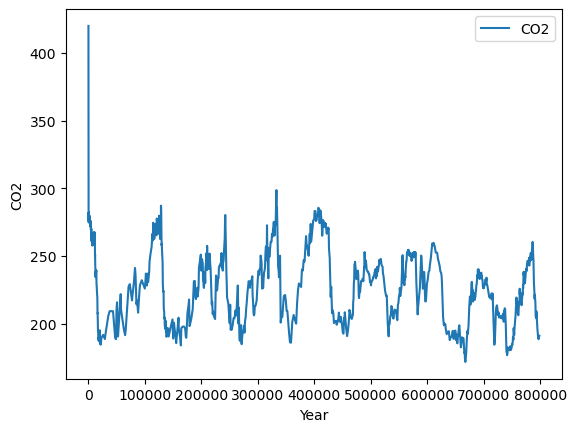

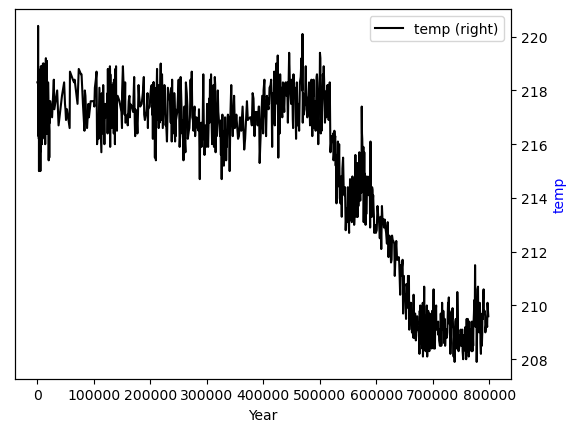

In [34]:
df_comp.plot(x="Year", y="CO2", ylabel=('CO2'))
#ax.set_xlim(0, 800000)
ax = df_comp.plot(x="Year", y="temp",secondary_y=True, color='k')
ax.set_ylabel('temp', color='b')
#ax2.set_ylim(200, 230)
plt.show()

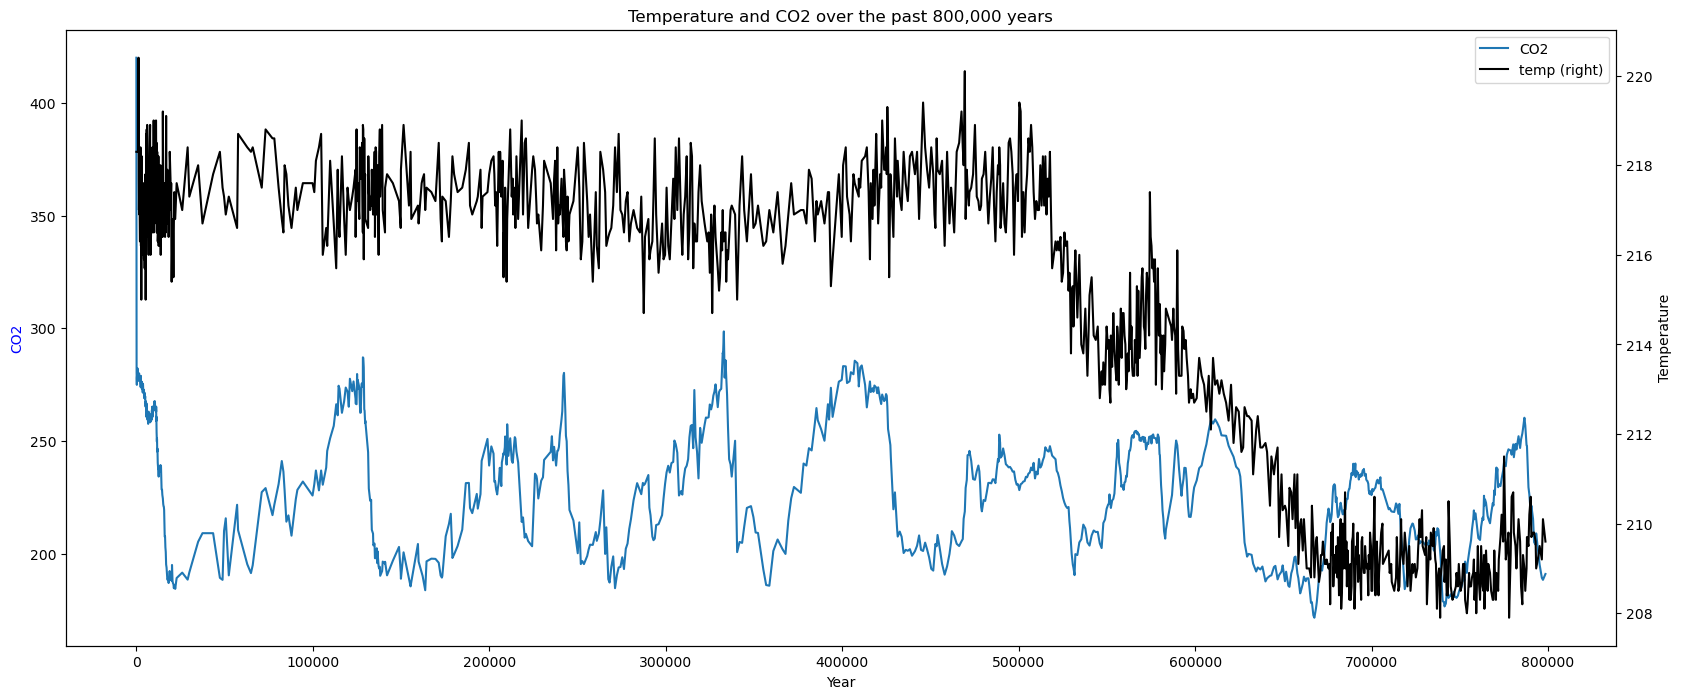

In [35]:
fig, ax = plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax)
ax.set_ylabel('CO2', color='b')
#ax.set_xlim(0, 800000)
df_comp.plot(x="Year", y="temp",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature')
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

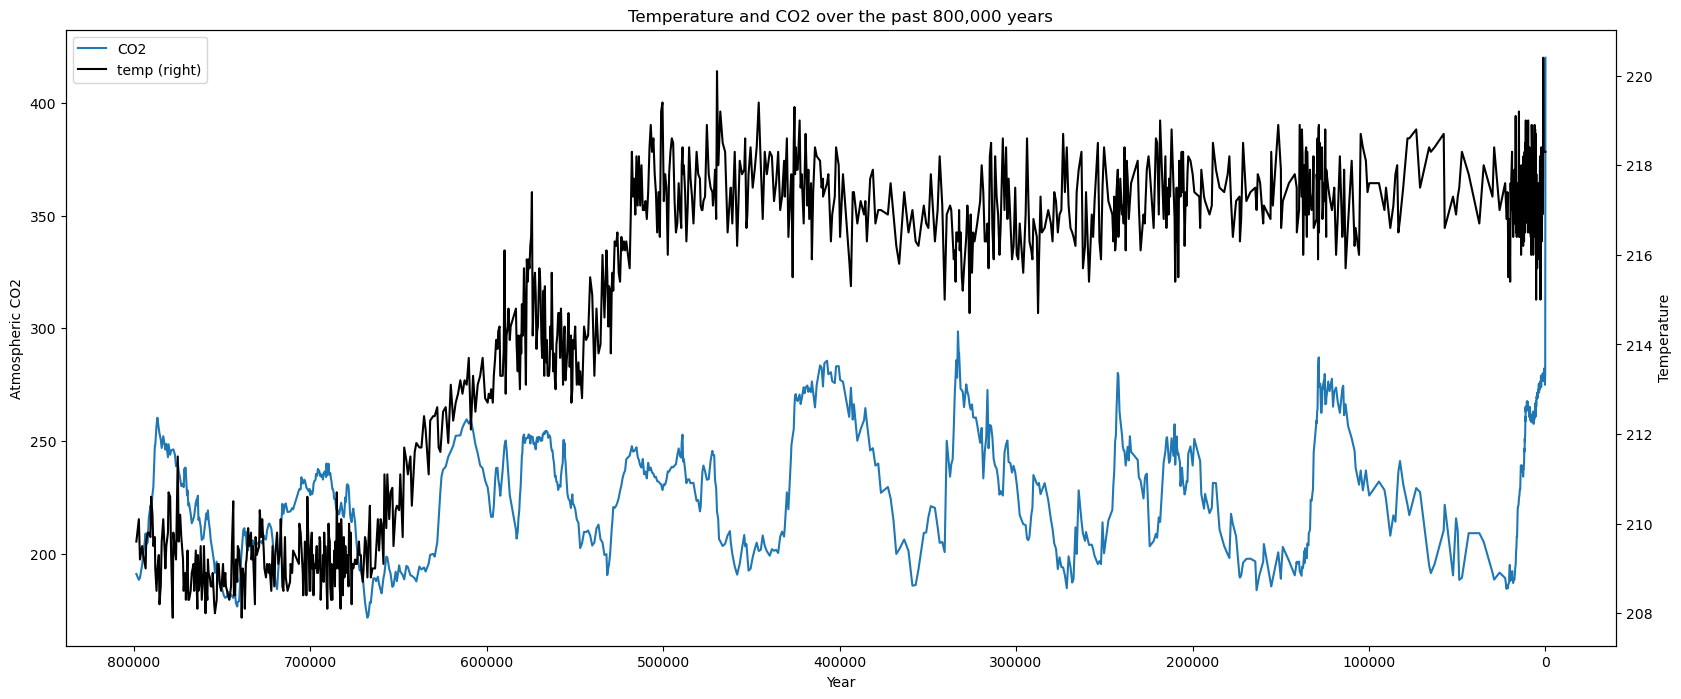

In [36]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
#ax.set_xlim(0, 800000)
df_comp.plot(x="Year", y="temp",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('Temperature')
plt.gca().invert_xaxis()
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

In [37]:
df_comp.dtypes

Year      int64
CO2     float64
temp    float64
dtype: object

In [38]:
#df_comp['Year_ts'] = pd.to_datetime(df_comp['Year'], format = '%y')
#df_comp.Year/1000

In [39]:
#df_comp.plot()

In [40]:
#result = pd.concat([df1.temp, df_comp], axis=1)
#result

In [41]:
#dti = pd.date_range(800000-01-01, periods=1000, freq="Y")

In [42]:
#pd.to_datetime(df_comp['Year'])

In [43]:
#name = "https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt"
#epica_df = pd.read_csv(name, skiprows=range(0,91), delimiter= '\s+', usecols = ['Age','Deuterium','Temperature'])
#epica_df

In [44]:
epica_df1 = pd.read_csv("epicadomec.txt", delimiter= '\s+', usecols = ['Age','Deuterium','Temperature'])
epica_df1

,Age,Deuterium,Temperature
0,38.37379,-390.90,0.88
1,46.81203,-385.10,1.84
2,55.05624,-377.80,3.04
3,64.41511,-394.10,0.35
4,73.15077,-398.70,-0.42
...,...,...,...
5783,797408.00000,-440.20,-8.73
5784,798443.00000,-439.00,-8.54
5785,799501.00000,-441.10,-8.88
5786,800589.00000,-441.42,-8.92


Text(0.5, 1.0, 'Temperature in Degrees Celsius over the past 800,000 years')

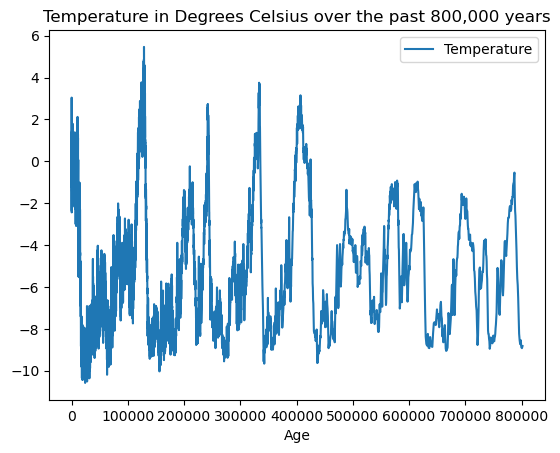

In [45]:
epica_df1.plot(x="Age", y="Temperature")
plt.title('Temperature in Degrees Celsius over the past 800,000 years')

In [46]:
epica_df1.Temperature.mean()

-4.580228176318059

In [47]:
#epica_df2 = pd.read_excel("Book1.xlsx")
#epica_df2

In [48]:
temp_celsius = epica_df1.Temperature
df_comp["TempCelsius"] = temp_celsius
df_comp

,Year,CO2,temp,TempCelsius
0,0,420.0,218.3,0.88
1,137,280.4,218.3,1.84
2,268,274.9,218.3,3.04
3,279,277.9,218.3,0.35
4,395,279.1,218.3,-0.42
...,...,...,...,...
1092,794608,199.4,209.3,-7.55
1093,795202,195.2,209.5,-7.93
1094,796467,189.3,209.2,-9.42
1095,797099,188.4,210.1,-8.88


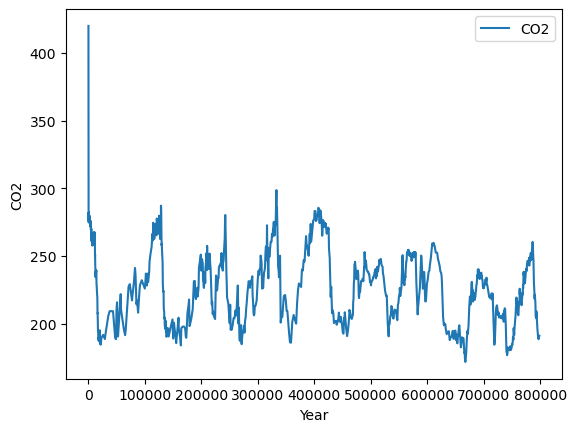

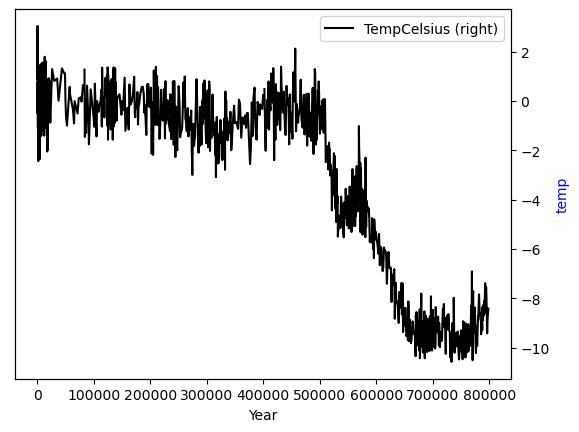

In [49]:
df_comp.plot(x="Year", y="CO2", ylabel=('CO2'))
#ax.set_xlim(0, 800000)
ax = df_comp.plot(x="Year", y="TempCelsius",secondary_y=True, color='k')
ax.set_ylabel('temp', color='b')
#ax2.set_ylim(200, 230)
plt.show()

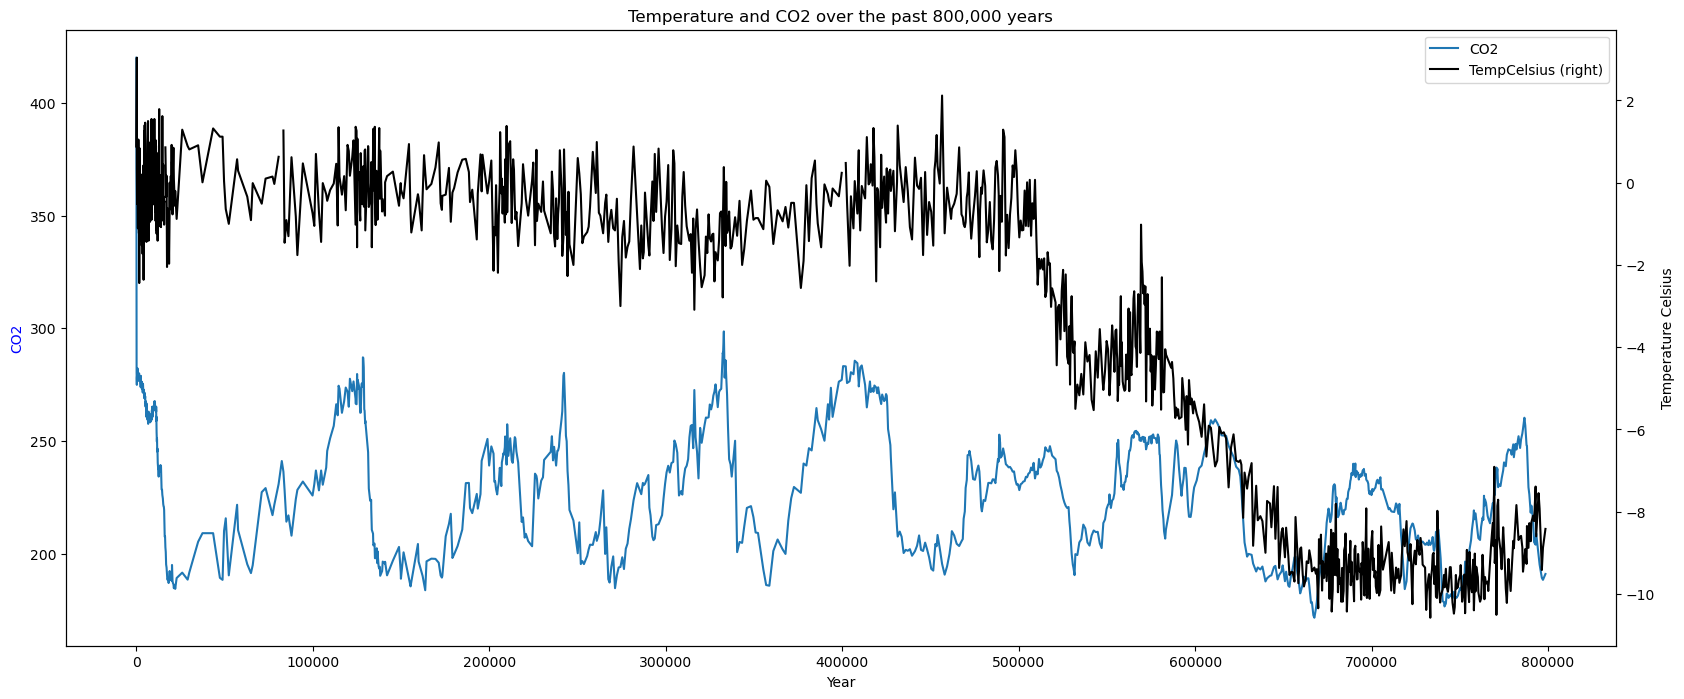

In [50]:
fig, ax = plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax)
ax.set_ylabel('CO2', color='b')
#ax.set_xlim(0, 800000)
df_comp.plot(x="Year", y="TempCelsius",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature Celsius')
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

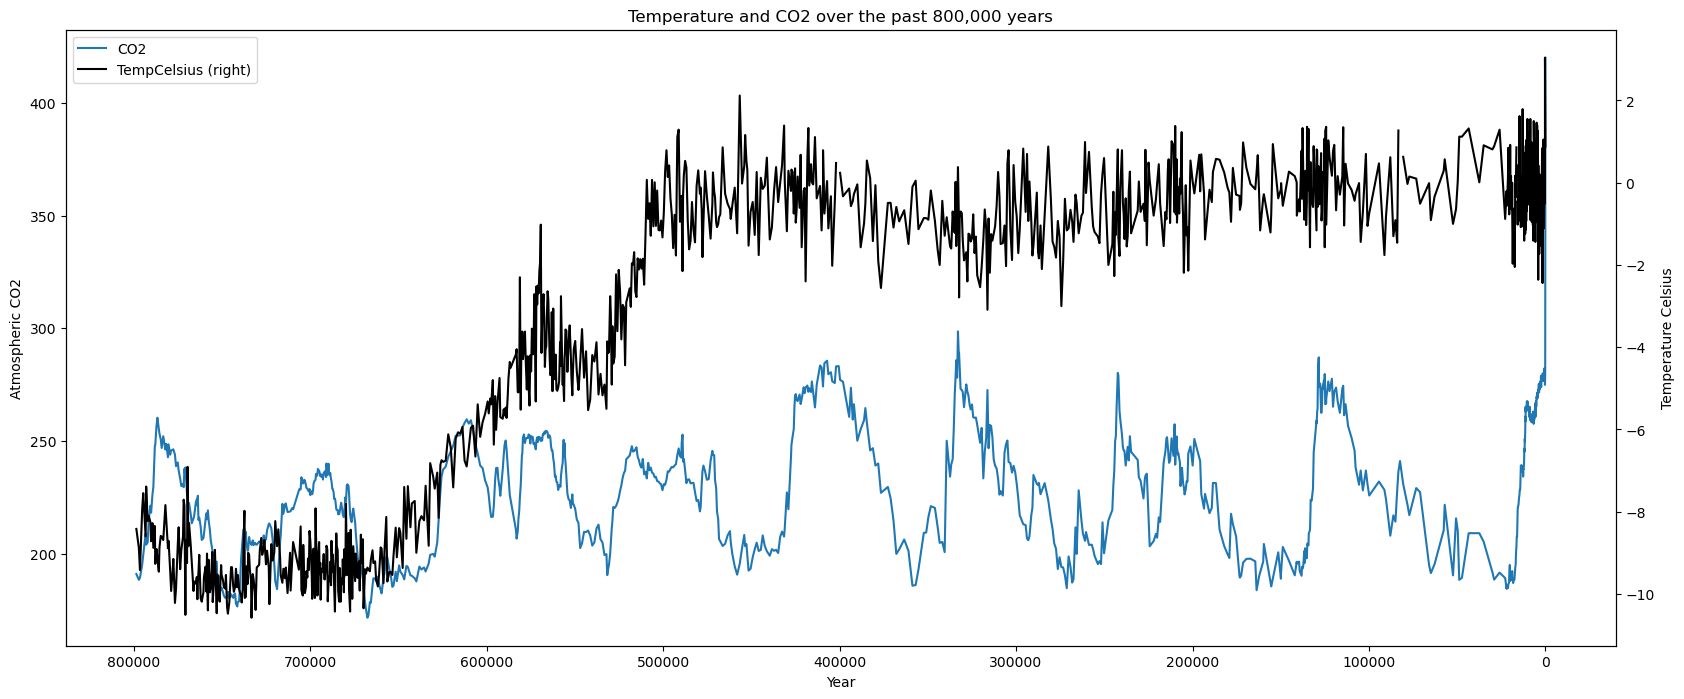

In [51]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
#ax.set_xlim(0, 800000)
df_comp.plot(x="Year", y="TempCelsius",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('Temperature Celsius')
plt.gca().invert_xaxis()
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

In [52]:
Year = df_comp.Year 
CO2 = df_comp.CO2
correlation = np.corrcoef(CO2, Year)
correlation

array([[ 1.        , -0.32974461],
       [-0.32974461,  1.        ]])

In [53]:
arr_year = np.array(Year)
arr_year

array([     0,    137,    268, ..., 796467, 797099, 798512], dtype=int64)

In [54]:
arr_CO2 = np.array(CO2)
arr_CO2

array([420. , 280.4, 274.9, ..., 189.3, 188.4, 191. ])

In [55]:
reshape_year = arr_year.reshape(-1,1)
reshape_CO2 = arr_CO2.reshape(-1,1)

In [56]:
lr = LinearRegression()
lr.fit(reshape_year,reshape_CO2)

LinearRegression()

In [57]:
pred_CO2 = lr.predict(reshape_year)
pred_CO2

array([[244.83046983],
       [244.82562112],
       [244.82098476],
       ...,
       [216.64186081],
       [216.61949303],
       [216.56948405]])

In [58]:
lr.predict([[-50]])

array([[244.83223944]])

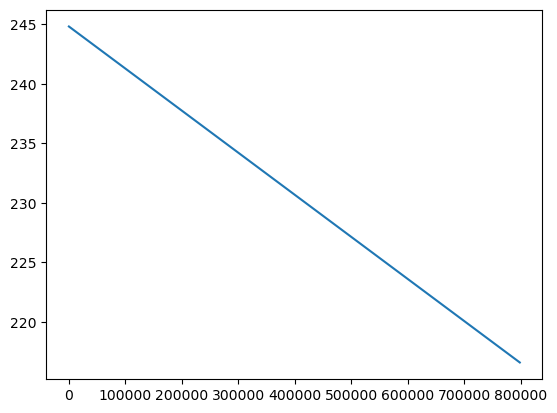

In [59]:
plt.plot(reshape_year, pred_CO2)
plt.show()

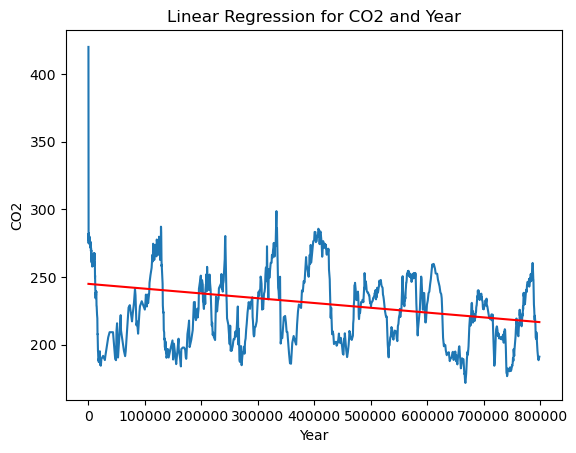

In [60]:
colour="red"
#plt.scatter(x,y)
#plt.plot(x,pred_y,colour )
fig, ax = plt.subplots(1, 1)
ax.plot(Year,CO2) 
ax.plot(Year,pred_CO2,colour) 
  
# Set title 
ax.set_title("Linear Regression for CO2 and Year") 
  
# adding labels 
ax.set_xlabel('Year') 
ax.set_ylabel('CO2')
plt.show()

In [61]:
temp = df_comp.temp
arr_temp = np.array(temp)
arr_temp

array([218.3, 218.3, 218.3, ..., 209.2, 210.1, 209.6])

In [62]:
correlation = np.corrcoef(temp, Year)
correlation

array([[ 1.       , -0.8060905],
       [-0.8060905,  1.       ]])

In [63]:
reshape_temp = arr_temp.reshape(-1,1)

In [64]:
lr = LinearRegression()
lr.fit(reshape_year,reshape_temp)

LinearRegression()

In [65]:
pred_temp = lr.predict(reshape_year)
pred_temp

array([[219.05250538],
       [219.05103767],
       [219.04963424],
       ...,
       [210.51977561],
       [210.51300486],
       [210.49786707]])

In [66]:
lr.predict([[-50]])

array([[219.05304104]])

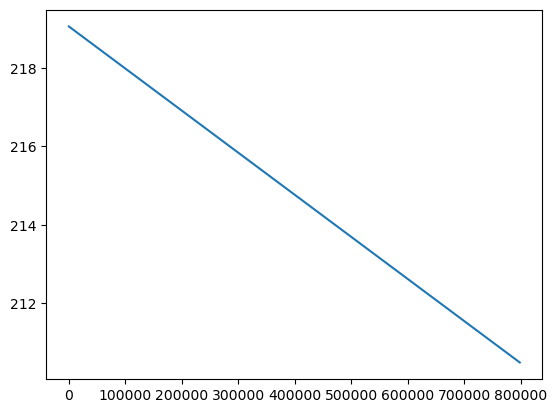

In [67]:
plt.plot(reshape_year, pred_temp)
plt.show()

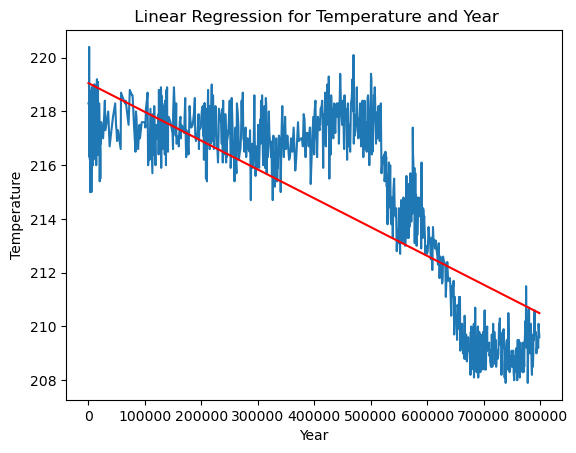

In [68]:
colour="red"
#plt.scatter(x,y)
#plt.plot(x,pred_y,colour )
fig, ax = plt.subplots(1, 1)
ax.plot(Year,temp) 
ax.plot(Year,pred_temp,colour) 
  
# Set title 
ax.set_title(" Linear Regression for Temperature and Year") 
  
# adding labels 
ax.set_xlabel('Year') 
ax.set_ylabel('Temperature')
plt.show()

In [69]:
df_birr = pd.read_csv("./data/Birr_Castle_second_order_station_1872-1911.csv")
df_birr = df_birr.rename(columns={'Daily': 'Day'})
df_birr

,Year,Month,Day,Max(F),Min(F),Max(C),Min(C)
0,1872,5,1,59.5,49.6,15.3,9.8
1,1872,5,2,56.8,47.6,13.8,8.7
2,1872,5,3,62.5,42.7,16.9,5.9
3,1872,5,4,59.2,42.1,15.1,5.6
4,1872,5,5,54.6,40.1,12.6,4.5
...,...,...,...,...,...,...,...
14208,1911,3,27,49.7,28.7,9.8,-1.8
14209,1911,3,28,41.1,35.6,5.1,2.0
14210,1911,3,29,49.8,39.8,9.9,4.3
14211,1911,3,30,52.1,37.2,11.2,2.9


In [70]:
df_Blacksod = pd.read_csv("./data/Blacksod Point_Belmullet_1872-1920.csv")
df_Botanic = pd.read_csv("./data/Botanic Gardens Dublin NLI series_1882-1952.csv")
df_Fitzwilliam = pd.read_csv("./data/Fitzwilliam Square Dublin_1871-1937.csv")
df_Killarney = pd.read_csv("./data/Killarney_1881-1933.csv")
#df_Malin = pd.read_csv("./data/Malin Head closed station_1955.csv")
df_Malin = pd.read_csv("./data/Malin Head_1885-1920.csv")
df_Markree = pd.read_csv("./data/Markree_ new screen_1953-1954.csv")
df_Markree_1850 = pd.read_csv("./data/Markree_1850-1968.csv")
df_NUIGalway = pd.read_csv("./data/NUI Galway_1851-1965.csv")
df_Phoenix = pd.read_csv("./data/Phoenix Park Dublin_1831-1958.csv")
df_Trinity = pd.read_csv("./data/Trinity College Dublin_1840-1959.csv")
df_Valentia = pd.read_csv("./data/Valentia Observatory telegraphic reporting station_1850-1920.csv")
df_Valentia_second = pd.read_csv("./data/Valentia Observatory_second order station_1883-1909.csv")

In [71]:
concat = pd.concat([df_birr, df_Blacksod, df_Fitzwilliam, df_Killarney, df_Malin, df_Markree, df_Markree_1850, df_NUIGalway, df_Phoenix, df_Trinity, df_Valentia, df_Valentia_second]).reset_index(drop=True)

In [72]:
concat['date'] = pd.to_datetime(dict(year=concat.Year, month=concat.Month, day=concat.Day))
concat

,Year,Month,Day,Max(F),Min(F),Max(C),Min(C),Min (F),date
0,1872,5,1,59.5,49.6,15.3,9.8,NaN,1872-05-01
1,1872,5,2,56.8,47.6,13.8,8.7,NaN,1872-05-02
2,1872,5,3,62.5,42.7,16.9,5.9,NaN,1872-05-03
3,1872,5,4,59.2,42.1,15.1,5.6,NaN,1872-05-04
4,1872,5,5,54.6,40.1,12.6,4.5,NaN,1872-05-05
...,...,...,...,...,...,...,...,...,...
295325,1909,9,26,62.9,47.2,17.2,8.4,NaN,1909-09-26
295326,1909,9,27,60.6,56.2,15.9,13.4,NaN,1909-09-27
295327,1909,9,28,63.5,54.9,17.5,12.7,NaN,1909-09-28
295328,1909,9,29,61.0,45.4,16.1,7.4,NaN,1909-09-29


In [73]:
concat = concat.set_index('date')
concat

,Year,Month,Day,Max(F),Min(F),Max(C),Min(C),Min (F)
date,,,,,,,,
1872-05-01,1872,5,1,59.5,49.6,15.3,9.8,NaN
1872-05-02,1872,5,2,56.8,47.6,13.8,8.7,NaN
1872-05-03,1872,5,3,62.5,42.7,16.9,5.9,NaN
1872-05-04,1872,5,4,59.2,42.1,15.1,5.6,NaN
1872-05-05,1872,5,5,54.6,40.1,12.6,4.5,NaN
...,...,...,...,...,...,...,...,...
1909-09-26,1909,9,26,62.9,47.2,17.2,8.4,NaN
1909-09-27,1909,9,27,60.6,56.2,15.9,13.4,NaN
1909-09-28,1909,9,28,63.5,54.9,17.5,12.7,NaN


In [74]:
concat['Avg_Cel'] = (concat['Max(C)']+concat['Min(C)'])/2
concat

,Year,Month,Day,Max(F),Min(F),Max(C),Min(C),Min (F),Avg_Cel
date,,,,,,,,,
1872-05-01,1872,5,1,59.5,49.6,15.3,9.8,NaN,12.55
1872-05-02,1872,5,2,56.8,47.6,13.8,8.7,NaN,11.25
1872-05-03,1872,5,3,62.5,42.7,16.9,5.9,NaN,11.40
1872-05-04,1872,5,4,59.2,42.1,15.1,5.6,NaN,10.35
1872-05-05,1872,5,5,54.6,40.1,12.6,4.5,NaN,8.55
...,...,...,...,...,...,...,...,...,...
1909-09-26,1909,9,26,62.9,47.2,17.2,8.4,NaN,12.80
1909-09-27,1909,9,27,60.6,56.2,15.9,13.4,NaN,14.65
1909-09-28,1909,9,28,63.5,54.9,17.5,12.7,NaN,15.10


In [75]:
concat.sort_values(by='date')

,Year,Month,Day,Max(F),Min(F),Max(C),Min(C),Min (F),Avg_Cel
date,,,,,,,,,
1831-01-01,1831,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1831-01-02,1831,1,2,NaN,NaN,NaN,NaN,NaN,NaN
1831-01-03,1831,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1831-01-04,1831,1,4,NaN,NaN,NaN,NaN,NaN,NaN
1831-01-05,1831,1,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1968-12-27,1968,12,27,NaN,NaN,4.2,-2.8,NaN,0.70
1968-12-28,1968,12,28,NaN,NaN,4.0,0.0,NaN,2.00
1968-12-29,1968,12,29,NaN,NaN,5.9,-1.0,NaN,2.45


Text(0.5, 1.0, 'Temperature in Ireland between 1831 and 1968')

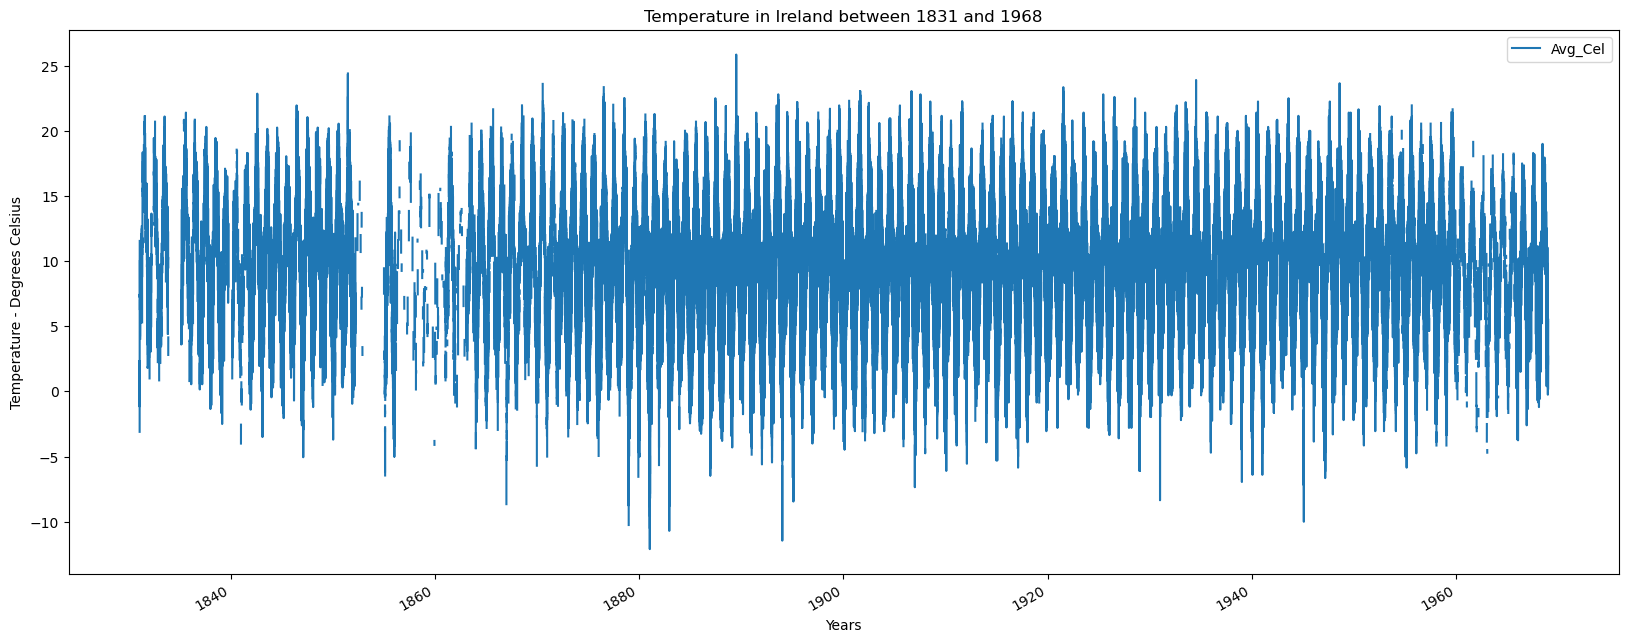

In [76]:
concat.plot(y="Avg_Cel", xlabel=('Years'), ylabel=('Temperature - Degrees Celsius'), figsize=(20,8))
plt.title('Temperature in Ireland between 1831 and 1968')

In [77]:
concat.corr()

,Year,Month,Day,Max(F),Min(F),Max(C),Min(C),Min (F),Avg_Cel
Year,1.000000,-0.004546,-0.000044,0.015029,-0.012695,0.013214,-0.018677,0.136374,-0.001296
Month,-0.004546,1.000000,0.010582,0.192879,0.217338,0.192476,0.216504,0.182247,0.216114
Day,-0.000044,0.010582,1.000000,0.002207,0.003161,0.002487,0.003552,0.025402,0.003375
Max(F),0.015029,0.192879,0.002207,1.000000,0.785823,0.999982,0.785690,0.697189,0.947529
Min(F),-0.012695,0.217338,0.003161,0.785823,1.000000,0.785834,0.999981,NaN,0.942223
Max(C),0.013214,0.192476,0.002487,0.999982,0.785834,1.000000,0.785083,0.697387,0.947378
Min(C),-0.018677,0.216504,0.003552,0.785690,0.999981,0.785083,1.000000,0.999979,0.942048
Min (F),0.136374,0.182247,0.025402,0.697189,NaN,0.697387,0.999979,1.000000,0.929332
Avg_Cel,-0.001296,0.216114,0.003375,0.947529,0.942223,0.947378,0.942048,0.929332,1.000000


In [78]:
concat.dropna(subset=['Year',"Avg_Cel"])

,Year,Month,Day,Max(F),Min(F),Max(C),Min(C),Min (F),Avg_Cel
date,,,,,,,,,
1872-05-01,1872,5,1,59.5,49.6,15.3,9.8,NaN,12.55
1872-05-02,1872,5,2,56.8,47.6,13.8,8.7,NaN,11.25
1872-05-03,1872,5,3,62.5,42.7,16.9,5.9,NaN,11.40
1872-05-04,1872,5,4,59.2,42.1,15.1,5.6,NaN,10.35
1872-05-05,1872,5,5,54.6,40.1,12.6,4.5,NaN,8.55
...,...,...,...,...,...,...,...,...,...
1909-09-26,1909,9,26,62.9,47.2,17.2,8.4,NaN,12.80
1909-09-27,1909,9,27,60.6,56.2,15.9,13.4,NaN,14.65
1909-09-28,1909,9,28,63.5,54.9,17.5,12.7,NaN,15.10


In [79]:
import statsmodels.api as sm
model = sm.OLS(concat.Year, concat.Avg_Cel, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Year   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                          1.107e+06
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                        0.00
Time:                        12:50:21   Log-Likelihood:                     -1.9258e+06
No. Observations:              237611   AIC:                                  3.852e+06
Df Residuals:                  237610   BIC:                                  3.852e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Avg_Cel      163.0177      0.155   1052.296      0.000     162.714     163.321
==============================================================================
Omnibus:                     4140.874   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2586.256
Skew:                           0.110   Prob(JB):                         0.00
Kurtosis:                       2.538   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
concat.Year.dtype

dtype('int64')

In [81]:
concat.Year = concat.Year.fillna('0.0')
arr_Year = np.array(concat.Year)

In [82]:
concat.Avg_Cel = concat.Avg_Cel.fillna('0.0')
arr_avg_cel = np.array(concat.Avg_Cel)

In [83]:
reshape_Year = arr_Year.reshape(-1,1)
reshape_avg_cel = arr_avg_cel.reshape(-1,1)

In [84]:
lr = LinearRegression()
lr.fit(reshape_Year,reshape_avg_cel)
#BELOW ARE MANY THINGS I TRIED THAT DIDN"T WORK
#mask = ~np.isnan(reshape_avg_cel) & ~np.isnan(reshape_Year)
#mask = mask.reshape(-1,1)
#reshape_Year = reshape_Year.reshape(-1,1)
#reshape_Year
#reshape_avg_cel
#lr.fit(reshape_Year,reshape_avg_cel)
#lr.fit(reshape_Year[mask],reshape_avg_cel[mask])
#my = ~(np.isnan(reshape_Year).any(axis=1))
#ma = ~(np.isnan(reshape_avg_cel).any(axis=1))
#m_y = reshape_Year[my]
#m_a = reshape_avg_cel[ma]
#regressor.fit(m_y[:, None], m_a)
#lr = LinearRegression().fit(m_y[:, None], m_a)

LinearRegression()

In [85]:
pred_avg_cel = lr.predict(reshape_Year)
pred_avg_cel

array([[6.61587939],
       [6.61587939],
       [6.61587939],
       ...,
       [8.06502473],
       [8.06502473],
       [8.06502473]])

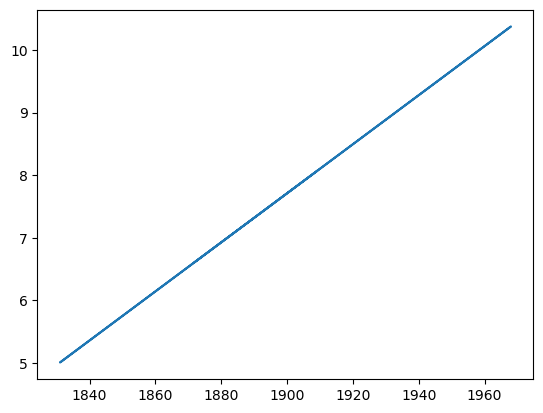

In [86]:
plt.plot(reshape_Year, pred_avg_cel)
plt.show()

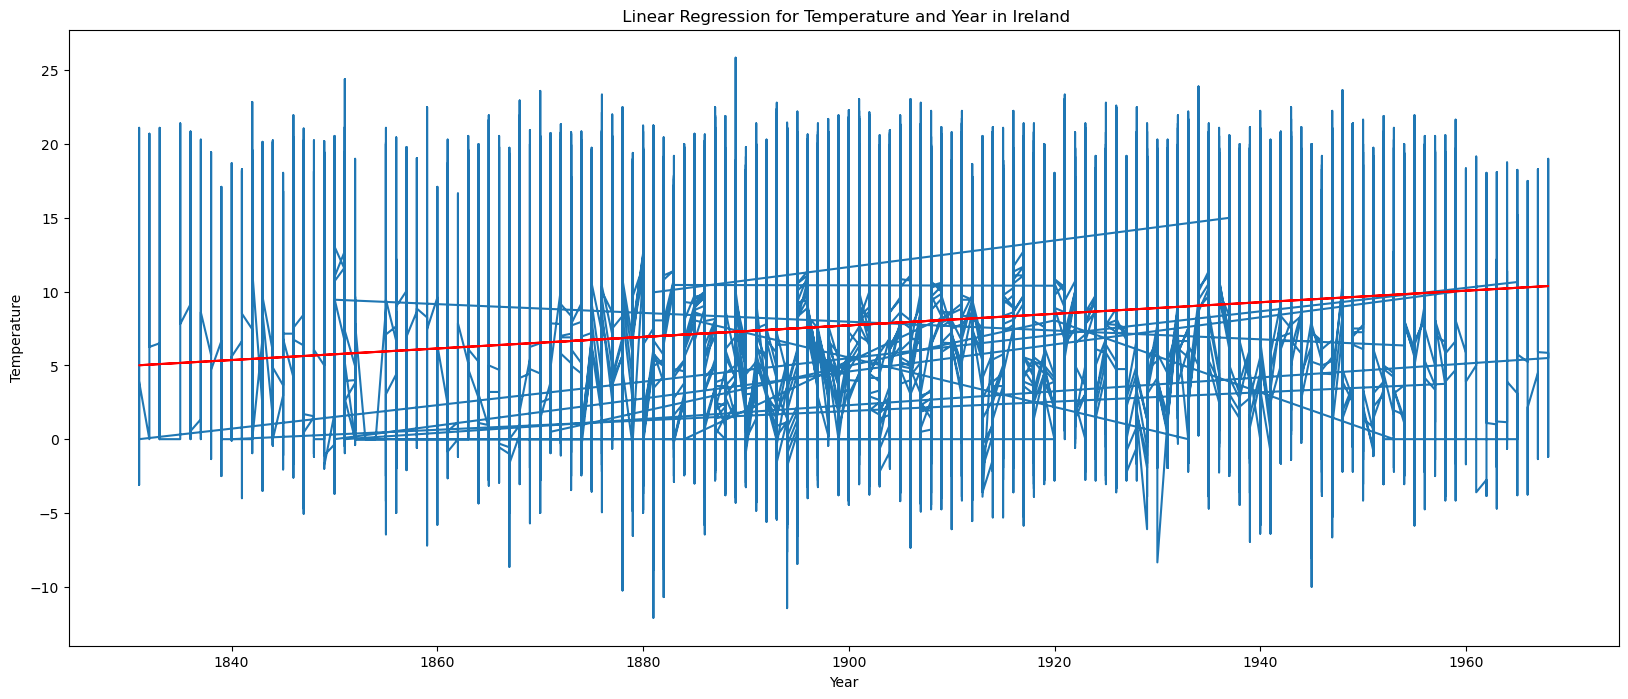

In [87]:
colour="red"
#plt.scatter(x,y)
#plt.plot(x,pred_y,colour )
fig, ax = plt.subplots(1, 1, figsize=(20,8))
ax.plot(concat.Year,concat.Avg_Cel) 
ax.plot(concat.Year,pred_avg_cel,colour) 
  
# Set title 
ax.set_title(" Linear Regression for Temperature and Year in Ireland") 
  
# adding labels 
ax.set_xlabel('Year') 
ax.set_ylabel('Temperature')
plt.show()

In [88]:
#name = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"
#df = pd.read_csv(name, skiprows=range(0,46), delimiter= '\s+', names =['year','mean','unc'], header=None)
#df

In [89]:
#df = pd.read_csv("https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv")